In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [157]:
df = pd.read_excel(r"C:\Users\lydia\Downloads\Yearly population GDP and waste data.xlsx")

In [131]:
df

,CountryID,Country,Country Code,Year,GDP per capita (current USD),GDP (current USD),GNI (current USD),GNI per capita (current USD),Municipal Waste Collected (1000 tonnes),Municipal Waste recycled (%),...,Hazardous Waste Generated Per Capita,Hazardous Waste Incinerated (tonnes),Hazardous Waste Landfilled (tonnes),Hazardous Waste Recycled (tonnes),Hazardous Waste Treated or Disposed (tonnes),Population growth (annual %),Population total,"12.2.2 - Domestic material consumption per capita, by type of raw material (tonnes) - EN_MAT_DOMCMPC - Total or no breakdown",Region,IncomeGroup
0,4,Afghanistan,AFG,1970,161.019274,1.731436e+09,1.766528e+09,164.282739,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.433183,10752971.0,NaN,South Asia,Low income
1,4,Afghanistan,AFG,1971,164.566181,1.812838e+09,1.850122e+09,167.950792,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.415369,11015857.0,NaN,South Asia,Low income
2,4,Afghanistan,AFG,1972,146.003034,1.647900e+09,1.683948e+09,149.196842,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.429396,11286753.0,NaN,South Asia,Low income
3,4,Afghanistan,AFG,1973,147.099044,1.702716e+09,1.739998e+09,150.319854,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.524421,11575305.0,NaN,South Asia,Low income
4,4,Afghanistan,AFG,1974,173.694213,2.061729e+09,2.106420e+09,177.459284,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.513007,11869879.0,NaN,South Asia,Low income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14046,716,Zimbabwe,ZWE,1966,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.129628,4588529.0,NaN,Sub-Saharan Africa,Lower middle income
14047,716,Zimbabwe,ZWE,1967,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.135761,4734694.0,NaN,Sub-Saharan Africa,Lower middle income
14048,716,Zimbabwe,ZWE,1968,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.152789,4886347.0,NaN,Sub-Saharan Africa,Lower middle income
14049,716,Zimbabwe,ZWE,1969,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.178674,5044163.0,NaN,Sub-Saharan Africa,Lower middle income


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14051 entries, 0 to 14050
Data columns (total 22 columns):
 #   Column                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                        --------------  -----  
 0   CountryID                                                                                                                     14051 non-null  int64  
 1   Country                                                                                                                       14051 non-null  object 
 2   Country Code                                                                                                                  13167 non-null  object 
 3   Year                                                                                                           

In [133]:
df.columns

Index(['CountryID', 'Country', 'Country Code', 'Year',
       'GDP per capita (current USD)', 'GDP (current USD)',
       'GNI (current USD)', 'GNI per capita (current USD)',
       'Municipal Waste Collected (1000 tonnes)',
       'Municipal Waste recycled (%)',
       'Total Population served by Municipal Waste collection',
       'Hazardous Waste Generated (tonnes)',
       'Hazardous Waste Generated Per Capita',
       'Hazardous Waste Incinerated (tonnes)',
       'Hazardous Waste Landfilled (tonnes)',
       'Hazardous Waste Recycled (tonnes)',
       'Hazardous Waste Treated or Disposed (tonnes)',
       'Population growth (annual %)', 'Population total',
       '12.2.2 - Domestic material consumption per capita, by type of raw material (tonnes) - EN_MAT_DOMCMPC - Total or no breakdown',
       'Region', 'IncomeGroup'],
      dtype='object')

In [158]:
df = df[df['Year'] == 2019]

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 49 to 11725
Data columns (total 22 columns):
 #   Column                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                        --------------  -----  
 0   CountryID                                                                                                                     228 non-null    int64  
 1   Country                                                                                                                       228 non-null    object 
 2   Country Code                                                                                                                  209 non-null    object 
 3   Year                                                                                                            

In [109]:
# df2.dropna(subset = ['Year', 'GDP per capita (current USD)', 'GDP (current USD)', 
#                     'Municipal Waste Collected (1000 tonnes)', 'Municipal Waste recycled (%)', 
#                    'Population growth (annual %)', 'Population total', 
#                    '12.2.2 - Domestic material consumption per capita, by type of raw material (tonnes) - EN_MAT_DOMCMPC - Total or no breakdown', 
#                    'Region', 'IncomeGroup'], inplace = True)

In [161]:
df = df[['Country', 'GDP per capita (current USD)', 'GDP (current USD)',
       'GNI (current USD)', 'GNI per capita (current USD)',
       'Municipal Waste Collected (1000 tonnes)',
       'Municipal Waste recycled (%)',
       'Population growth (annual %)', 'Population total',
       '12.2.2 - Domestic material consumption per capita, by type of raw material (tonnes) - EN_MAT_DOMCMPC - Total or no breakdown',
       'Region', 'IncomeGroup']]

In [163]:
# df = df.dropna(axis=1)
df.dropna(inplace = True)

In [165]:
df.shape

(41, 12)

In [166]:
df['IncomeGroup'].value_counts()

High income            32
Upper middle income     8
Lower middle income     1
Name: IncomeGroup, dtype: int64

In [182]:
# Assignment of colors to labels

label_colors = []
for index, row in df.iterrows():
    if row['IncomeGroup'] == 'High income':
        label_colors.append('blue')
    elif row['IncomeGroup'] == 'Upper middle income':
        label_colors.append('deepskyblue')
    elif row['IncomeGroup'] == 'Lower middle income':
        label_colors.append('paleturquoise')
#     else:
#         label_colors.append('red')

In [168]:
df = df.set_index(['Country'])
#df.drop(columns = ['CountryID', 'Country Code'], inplace=True)

# Perform one-hot encoding on categorical columns
df_encoding = pd.get_dummies(df)

In [169]:
df

,GDP per capita (current USD),GDP (current USD),GNI (current USD),GNI per capita (current USD),Municipal Waste Collected (1000 tonnes),Municipal Waste recycled (%),Population growth (annual %),Population total,"12.2.2 - Domestic material consumption per capita, by type of raw material (tonnes) - EN_MAT_DOMCMPC - Total or no breakdown",Region,IncomeGroup
Country,,,,,,,,,,,
Argentina,10006.693111,4.477547e+11,4.350091e+11,9721.846827,18959.000000,5.660109,0.993397,44938712.0,17.01,Latin America & Caribbean,Upper middle income
Austria,50070.290576,4.446212e+11,4.433481e+11,49926.921230,5220.000000,26.111111,0.444674,8879920.0,16.23,Europe & Central Asia,High income
Bahrain,25869.206182,3.865346e+10,3.639255e+10,24356.073795,1796.632568,19.797618,0.459363,1494188.0,21.49,Middle East & North Africa,High income
Belgium,46551.210743,5.358309e+11,5.410145e+11,47001.546015,4779.000000,34.128479,0.540461,11488980.0,17.52,Europe & Central Asia,High income
Bermuda,116333.385570,7.423466e+09,7.324237e+09,114778.364571,86.400002,0.462963,-0.010952,63911.0,12.84,North America,High income
Croatia,15092.428222,6.232799e+10,6.220614e+10,15062.924907,1812.000000,26.710817,-0.554147,4065253.0,9.81,Europe & Central Asia,High income
Cuba,9139.415856,1.034280e+11,1.018736e+11,9002.061290,5782.100000,3.386313,-0.101983,11316697.0,9.38,Latin America & Caribbean,Upper middle income
Cyprus,29850.506960,2.594517e+10,2.454224e+10,28236.409078,571.000000,14.886165,0.817518,1228836.0,28.75,Europe & Central Asia,High income
Czechia,23968.043261,2.525482e+11,2.372843e+11,22519.427718,5338.000000,22.011990,0.393789,10671870.0,16.17,Europe & Central Asia,High income


In [170]:
df_encoding

,GDP per capita (current USD),GDP (current USD),GNI (current USD),GNI per capita (current USD),Municipal Waste Collected (1000 tonnes),Municipal Waste recycled (%),Population growth (annual %),Population total,"12.2.2 - Domestic material consumption per capita, by type of raw material (tonnes) - EN_MAT_DOMCMPC - Total or no breakdown",Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Latin America & Caribbean,Region_Middle East & North Africa,Region_North America,IncomeGroup_High income,IncomeGroup_Lower middle income,IncomeGroup_Upper middle income
Country,,,,,,,,,,,,,,,,,
Argentina,10006.693111,4.477547e+11,4.350091e+11,9721.846827,18959.000000,5.660109,0.993397,44938712.0,17.01,0,0,1,0,0,0,0,1
Austria,50070.290576,4.446212e+11,4.433481e+11,49926.921230,5220.000000,26.111111,0.444674,8879920.0,16.23,0,1,0,0,0,1,0,0
Bahrain,25869.206182,3.865346e+10,3.639255e+10,24356.073795,1796.632568,19.797618,0.459363,1494188.0,21.49,0,0,0,1,0,1,0,0
Belgium,46551.210743,5.358309e+11,5.410145e+11,47001.546015,4779.000000,34.128479,0.540461,11488980.0,17.52,0,1,0,0,0,1,0,0
Bermuda,116333.385570,7.423466e+09,7.324237e+09,114778.364571,86.400002,0.462963,-0.010952,63911.0,12.84,0,0,0,0,1,1,0,0
Croatia,15092.428222,6.232799e+10,6.220614e+10,15062.924907,1812.000000,26.710817,-0.554147,4065253.0,9.81,0,1,0,0,0,1,0,0
Cuba,9139.415856,1.034280e+11,1.018736e+11,9002.061290,5782.100000,3.386313,-0.101983,11316697.0,9.38,0,0,1,0,0,0,0,1
Cyprus,29850.506960,2.594517e+10,2.454224e+10,28236.409078,571.000000,14.886165,0.817518,1228836.0,28.75,0,1,0,0,0,1,0,0
Czechia,23968.043261,2.525482e+11,2.372843e+11,22519.427718,5338.000000,22.011990,0.393789,10671870.0,16.17,0,1,0,0,0,1,0,0


In [171]:
samples = df_encoding.to_numpy()

ks = range(1, 30)
inertias = []

for k in ks:

    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(samples)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

C:\Users\lydia\anaconda3_new\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


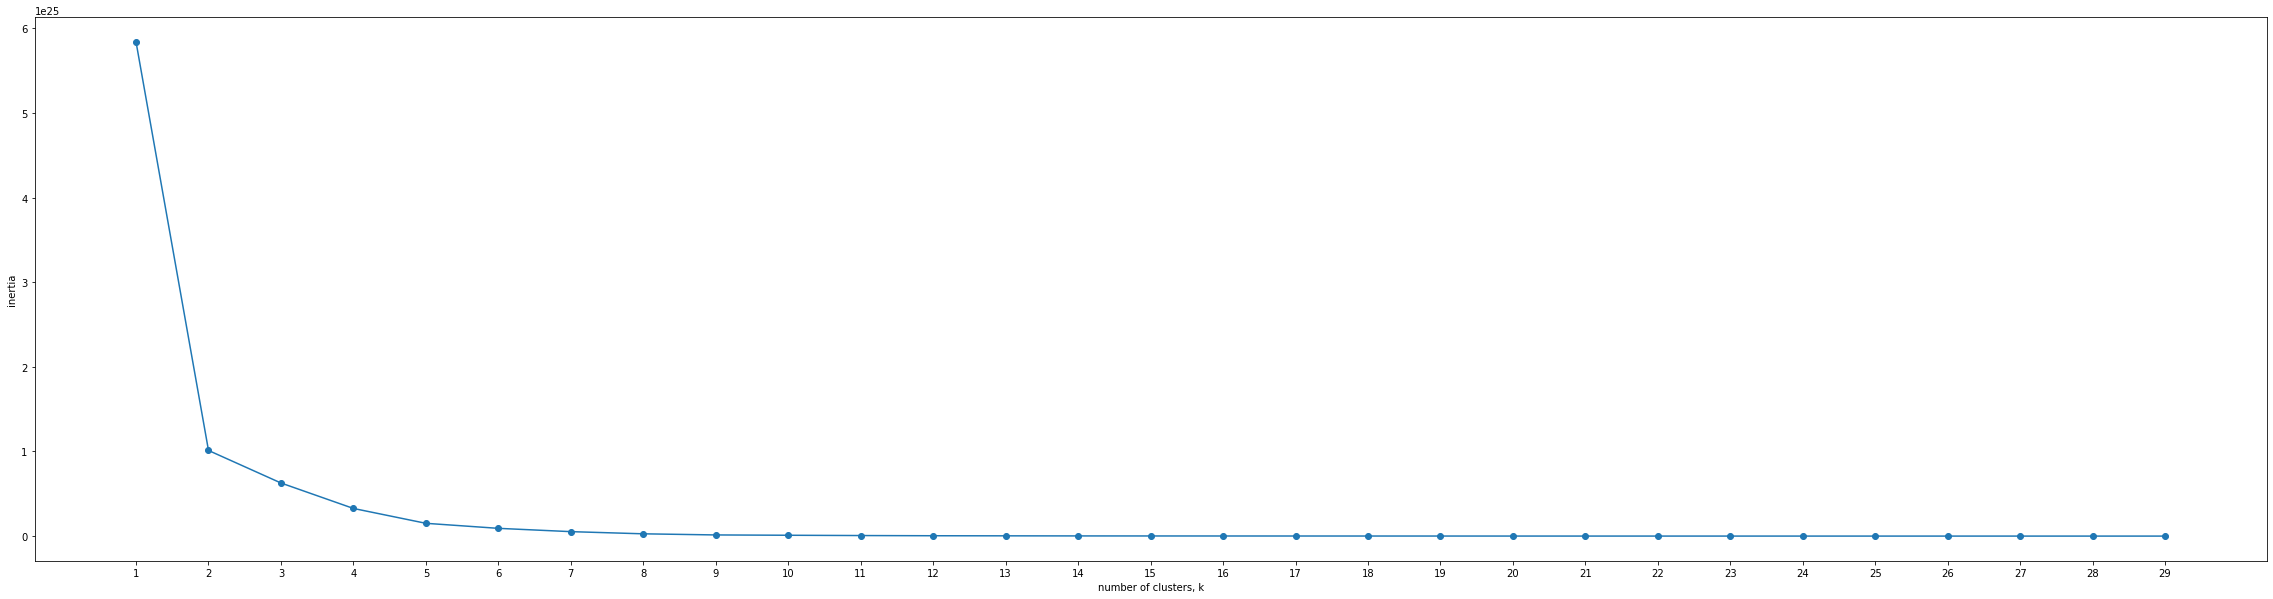

In [172]:
# Plot ks vs inertias

plt.figure(figsize=(40,10))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

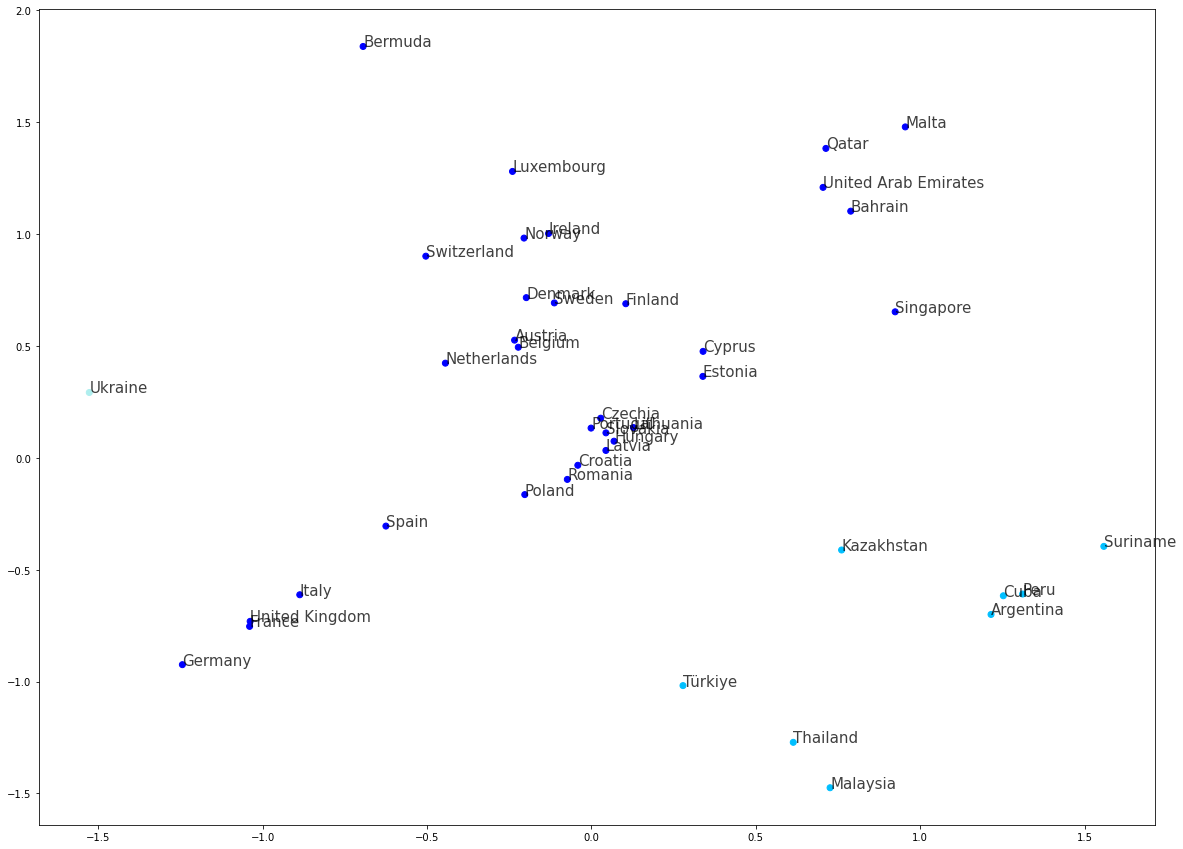

In [184]:
# Create scaler: scaler
scaler = StandardScaler()

# Create a TSNE instance: model
model = TSNE(learning_rate=2)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, model)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = pipeline.fit_transform(df_encoding)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.figure(figsize=(20,15))
plt.scatter(xs, ys, alpha=1, c=label_colors)

# Annotate the points
for x, y, candidate in zip(xs, ys, df_encoding.index):
    plt.annotate(candidate, (x, y), fontsize=15, alpha=0.75)

#plt.savefig(path + "python_script//python_output//clustering_colors_3.png", format='png', bbox_inches='tight')